# Fashion Image Classification Laboratory
## Problem Statement and Learning Objectives

### Overview
In this laboratory, you will build and compare different classification algorithms to identify clothing items from images. You'll work with the Fashion MNIST dataset, which contains 70,000 grayscale images of 10 different clothing categories.

### Learning Objectives
- Implement and understand K-Nearest Neighbors (KNN) classification
- Build and train Logistic Regression classifiers
- Apply Softmax Regression for multi-class classification
- Use Support Vector Machines (SVM) with different kernels
- Compare classification metrics and evaluate model performance

### Dataset Description
The Fashion MNIST dataset includes:
- 60,000 training images
- 10,000 test images
- 28x28 grayscale images
- 10 classes:
  * T-shirt/top
  * Trouser
  * Pullover
  * Dress
  * Coat
  * Sandal
  * Shirt
  * Sneaker
  * Bag
  * Ankle boot

## Laboratory Tasks

### Part 1: Data Preparation and Exploration (1 hour)
1. Load and examine the Fashion MNIST dataset
2. Visualize sample images from each class
3. Prepare data for classification (normalization, train/test split)
4. Implement basic data visualization functions

### Part 2: K-Nearest Neighbors Implementation (1 hour)
1. Implement KNN classifier from scratch
2. Experiment with different values of k
3. Calculate and compare accuracy metrics
4. Visualize decision boundaries for sample cases

### Part 3: Logistic Regression (1 hour)
1. Implement binary classification for two clothing categories
2. Train the model using gradient descent
3. Evaluate model performance
4. Visualize the learning process

### Part 4: Softmax Regression (1 hour)
1. Extend to multi-class classification
2. Implement the softmax function
3. Train the model on all clothing categories
4. Compare performance with previous methods

### Part 5: Support Vector Machines (1 hour)
1. Apply SVM with different kernels (linear, RBF)
2. Experiment with C and gamma parameters
3. Compare performance across kernel types
4. Visualize decision boundaries

### Part 6: Model Comparison and Analysis (1 hour)
1. Calculate comprehensive metrics for all models
2. Create confusion matrices
3. Analyze misclassified examples
4. Write a detailed comparison report

Visualizing sample images...


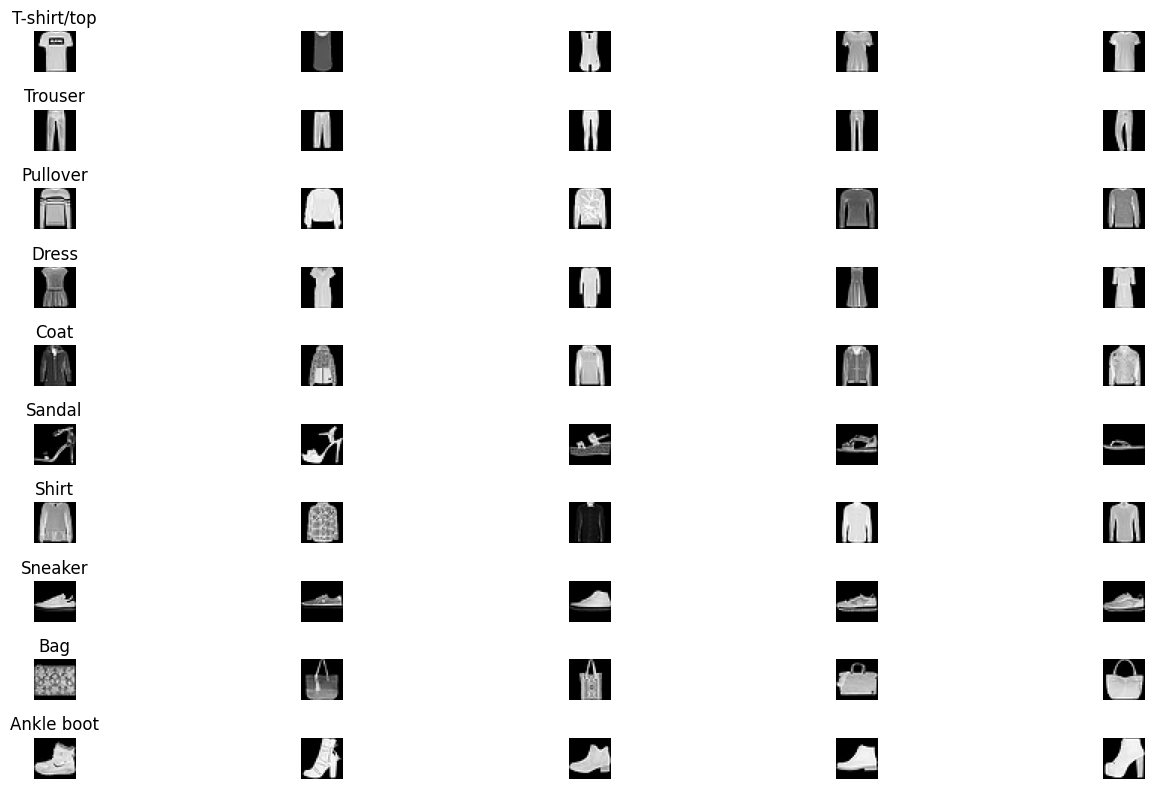


Running KNN Classification...


100%|██████████| 1000/1000 [00:54<00:00, 18.25it/s]



KNN Results:
Accuracy: 0.827

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.69      0.85      0.76       107
     Trouser       0.98      0.96      0.97       105
    Pullover       0.72      0.80      0.76       111
       Dress       0.87      0.77      0.82        93
        Coat       0.82      0.73      0.77       115
      Sandal       0.96      0.83      0.89        87
       Shirt       0.60      0.55      0.57        97
     Sneaker       0.88      0.89      0.89        95
         Bag       0.99      0.94      0.96        95
  Ankle boot       0.86      0.96      0.91        95

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



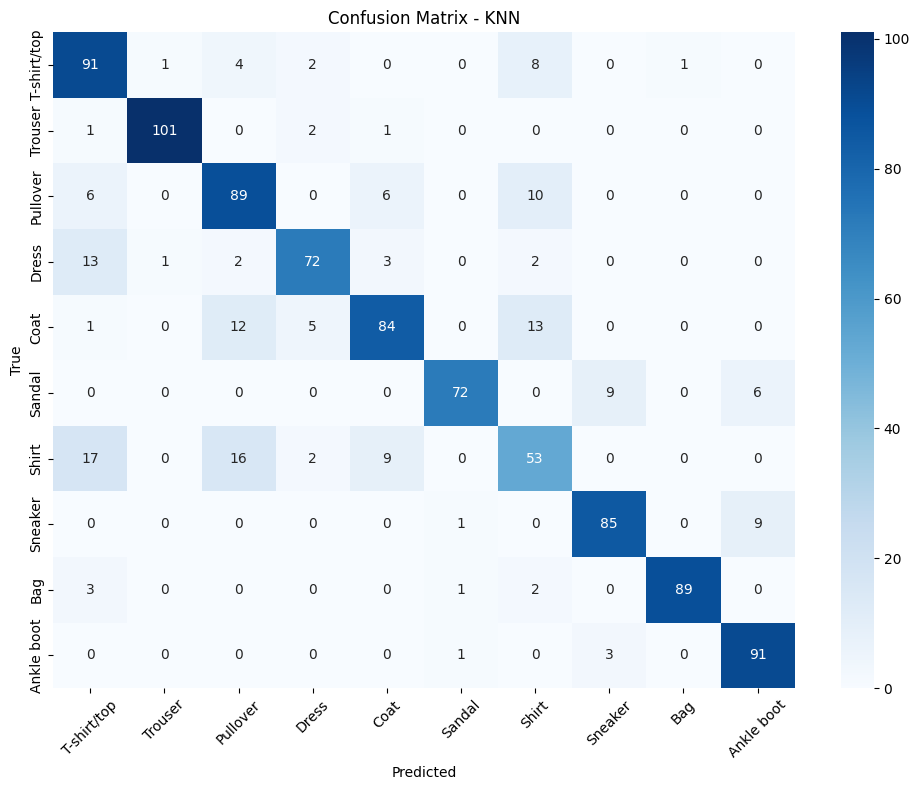


Running Binary Logistic Regression...

Logistic Regression (Binary) Results:
Accuracy: 0.9811320754716981

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.98      0.98      0.98       107
     Trouser       0.98      0.98      0.98       105

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



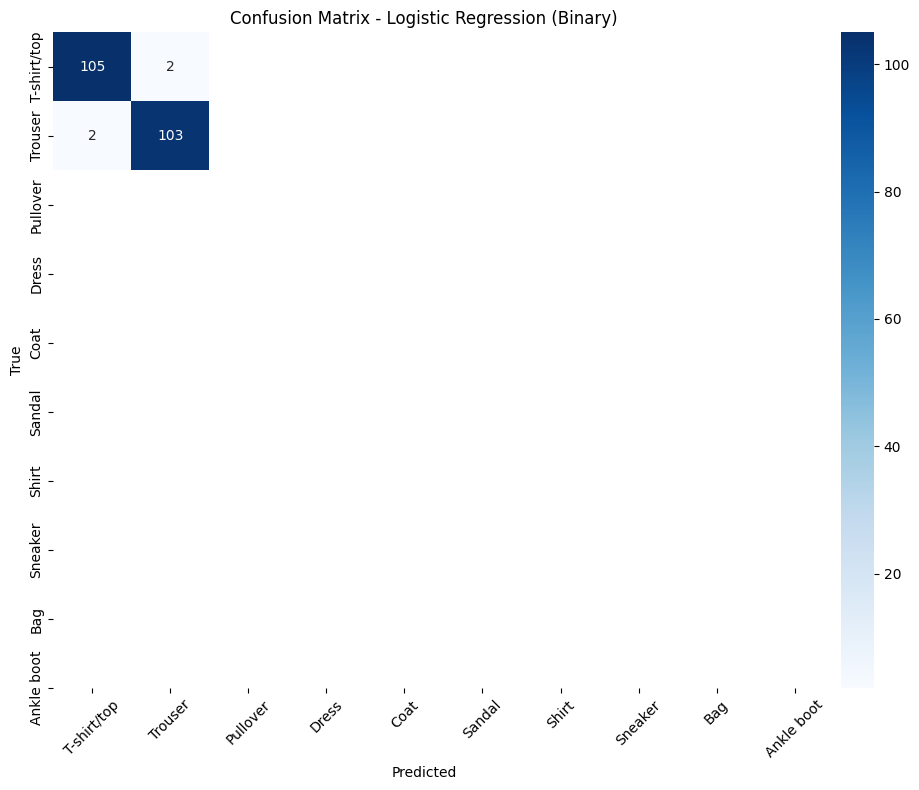


Running Softmax Regression...

Softmax Regression Results:
Accuracy: 0.771

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.82      0.81       107
     Trouser       0.96      0.92      0.94       105
    Pullover       0.73      0.67      0.69       111
       Dress       0.75      0.84      0.79        93
        Coat       0.64      0.74      0.69       115
      Sandal       0.95      0.60      0.73        87
       Shirt       0.52      0.39      0.45        97
     Sneaker       0.74      0.85      0.79        95
         Bag       0.90      0.95      0.92        95
  Ankle boot       0.79      0.93      0.85        95

    accuracy                           0.77      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



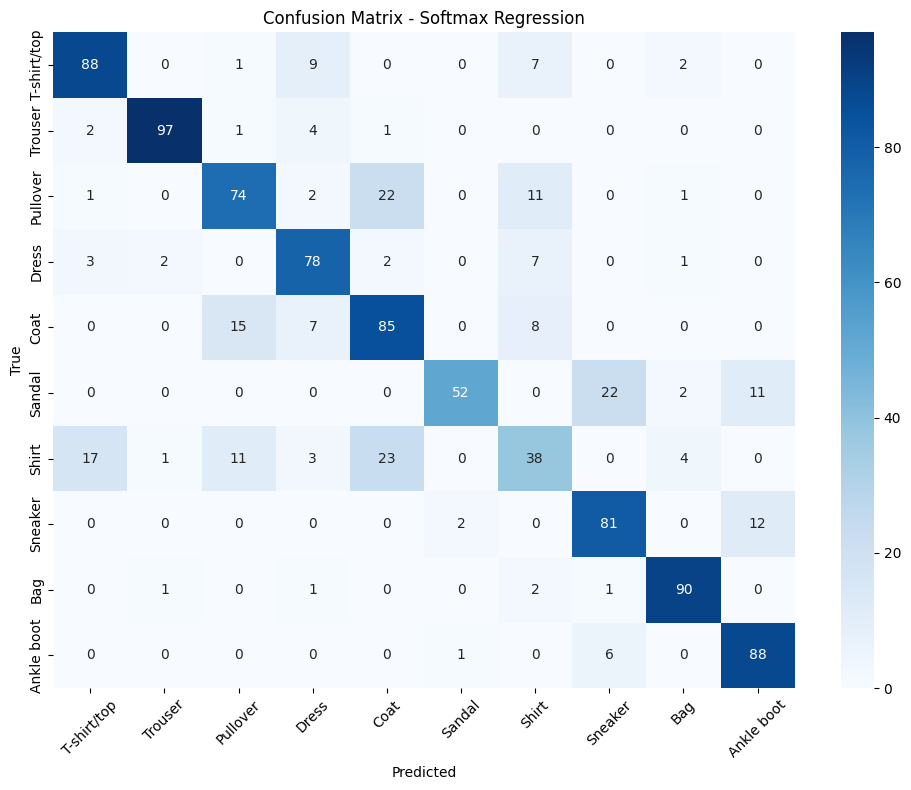

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from tqdm import tqdm

class FashionClassifier:
    def __init__(self):
        # Class labels for Fashion MNIST
        self.class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        self.load_data()
        
    def load_data(self):
        """Load and preprocess Fashion MNIST dataset"""
        # Load data
        (self.X_train, self.y_train), (self.X_test, self.y_test) = fashion_mnist.load_data() # [(x_train, y_train), (x_test, y_test)]
        
        # Reshape and normalize data 
        self.X_train = self.X_train.reshape(self.X_train.shape[0], -1) / 255.0
        self.X_test = self.X_test.reshape(self.X_test.shape[0], -1) / 255.0
        
        # Take a subset for faster training during development
        self.X_train = self.X_train[:10000]
        self.y_train = self.y_train[:10000]
        self.X_test = self.X_test[:1000]
        self.y_test = self.y_test[:1000]
        
    def visualize_samples(self, num_samples=5):
        """Visualize sample images from each class"""
        plt.figure(figsize=(15, 8))
        for class_idx in range(10):
            for sample_idx in range(num_samples):
                plt.subplot(10, num_samples, class_idx * num_samples + sample_idx + 1)
                plt.imshow(self.X_train[self.y_train == class_idx][sample_idx].reshape(28, 28),
                          cmap='gray')
                plt.axis('off')
                if sample_idx == 0:
                    plt.title(self.class_names[class_idx])
        plt.tight_layout()
        plt.show()

    class KNNClassifier:
        def __init__(self, k=3):
            self.k = k
            
        def fit(self, X, y):
            self.X_train = X
            self.y_train = y
            
        def predict(self, X):
            predictions = []
            for x in tqdm(X):                  # Calculate distances to all training points
                distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
                # Get k nearest neighbors
                k_indices = np.argsort(distances)[:self.k] # [2,3 , 1 , 6]
                k_nearest_labels = self.y_train[k_indices] # [0,0 , 3]
                # Make prediction by majority vote
                prediction = np.bincount(k_nearest_labels).argmax()
                predictions.append(prediction)
            return np.array(predictions)

    class LogisticRegression:
        def __init__(self, learning_rate=0.1, num_iterations=100):
            self.learning_rate = learning_rate
            self.num_iterations = num_iterations
            
        def sigmoid(self, z):
            return 1 / (1 + np.exp(-z))
        
        def fit(self, X, y, binary_classes=(0, 1)):
            # Filter for binary classification (7, 9)
            mask = np.isin(y, binary_classes) # y = [0,4,5,7,9,1,...] ---> [true,false,false,]
            X = X[mask]
            y = y[mask] #[7,9,7,9,7,7,]
            y = (y == binary_classes[1]).astype(int) # [false, true, false, ....] --> [0, 1]
            
            self.weights = np.zeros(X.shape[1])
            self.bias = 0
            
            for _ in range(self.num_iterations):
                # Forward pass
                z = np.dot(X, self.weights) + self.bias # [5,6,3.5, -5,]
                predictions = self.sigmoid(z)
                
                # Backward pass
                dz = predictions - y
                dw = np.dot(X.T, dz) / len(y)
                db = np.sum(dz) / len(y)
                
                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
        def predict(self, X):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            return (predictions >= 0.5).astype(int)

    class SoftmaxRegression:
        def __init__(self, learning_rate=0.1, num_iterations=100):
            self.learning_rate = learning_rate
            self.num_iterations = num_iterations
            
        def softmax(self, z):
            exp = np.exp(z - np.max(z, axis=1, keepdims=True))
            return exp / np.sum(exp, axis=1, keepdims=True)
            
        def fit(self, X, y):
            num_classes = len(np.unique(y))
            self.weights = np.zeros((X.shape[1], num_classes))
            self.bias = np.zeros(num_classes)
            
            # One-hot encode labels
            y_onehot = np.zeros((len(y), num_classes))
            y_onehot[np.arange(len(y)), y] = 1 # np.arange(5) --> [0,1,2,3,4, 9999], [0,8,4,3,]
            
            for _ in range(self.num_iterations):
                # Forward pass
                z = np.dot(X, self.weights) + self.bias
                predictions = self.softmax(z)
                
                # Backward pass
                error = predictions - y_onehot
                dw = np.dot(X.T, error) / len(y)
                db = np.sum(error, axis=0) / len(y)
                
                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
        def predict(self, X):
            z = np.dot(X, self.weights) + self.bias
            return np.argmax(self.softmax(z), axis=1)

    def evaluate_model(self, y_true, y_pred, model_name, lr = False):
        """Evaluate model performance and display metrics"""
        print(f"\n{model_name} Results:")
        print("Accuracy:", accuracy_score(y_true, y_pred))
        print("\nClassification Report:")
        
        print(classification_report(y_true, y_pred, target_names=self.class_names if not lr else self.lrClasses))
        
        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_experiments(self):
        """Run all classification experiments"""
        # 1. KNN Classification
        print("\nRunning KNN Classification...")
        knn = self.KNNClassifier(k=3)
        knn.fit(self.X_train, self.y_train)
        knn_predictions = knn.predict(self.X_test)
        self.evaluate_model(self.y_test, knn_predictions, "KNN")

        # 2. Binary Logistic Regression (T-shirt vs. Trouser)
        print("\nRunning Binary Logistic Regression...")
        log_reg = self.LogisticRegression(learning_rate=0.1, num_iterations=100)
        binary_classes =(0, 1)
        self.lrClasses = [self.class_names[cls] for cls in binary_classes]
        log_reg.fit(self.X_train, self.y_train, binary_classes)
        # Evaluate only on test samples from the two classes
        test_mask = np.isin(self.y_test, binary_classes)
        log_reg_predictions = log_reg.predict(self.X_test[test_mask])
        self.evaluate_model(self.y_test[test_mask], log_reg_predictions, "Logistic Regression (Binary)", True)

        # 3. Softmax Regression
        print("\nRunning Softmax Regression...")
        softmax = self.SoftmaxRegression(learning_rate=0.1, num_iterations=100)
        softmax.fit(self.X_train, self.y_train)
        softmax_predictions = softmax.predict(self.X_test)
        self.evaluate_model(self.y_test, softmax_predictions, "Softmax Regression")

        # 4. SVM Classification
        

if __name__ == "__main__":
    # Initialize and run the fashion classifier
    classifier = FashionClassifier()
    
    # Visualize sample images
    print("Visualizing sample images...")
    classifier.visualize_samples()
    
    # Run all experiments
    classifier.run_experiments()


In [7]:
ex 1 :
- tkj dx  
- fdk

output:




comment:


SyntaxError: invalid syntax (3619870347.py, line 1)